<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/nambale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
# import data
data=pd.read_csv('/content/simulated_sugarcane_dataset.csv')
data.head()

,Farm_Size_ha,Fertilizer_kg_per_ha,Labor_Workers,Sugarcane_Yield_tph
0,2.185431,57.857296,8,19.440051
1,4.778214,209.102603,4,26.838741
2,3.793973,128.588995,1,18.173035
3,3.193963,177.142673,8,20.263296
4,1.202084,276.891618,4,26.619715


In [3]:
#round off data to 2dp
data=data.round(2)
data.head()

,Farm_Size_ha,Fertilizer_kg_per_ha,Labor_Workers,Sugarcane_Yield_tph
0,2.19,57.86,8,19.44
1,4.78,209.10,4,26.84
2,3.79,128.59,1,18.17
3,3.19,177.14,8,20.26
4,1.20,276.89,4,26.62


In [4]:
round(data.describe(),2)

,Farm_Size_ha,Fertilizer_kg_per_ha,Labor_Workers,Sugarcane_Yield_tph
count,100.00,100.00,100.00,100.00
mean,2.62,174.46,4.69,21.63
std,1.34,73.28,2.66,6.96
min,0.52,51.74,1.00,5.14
25%,1.37,110.50,2.00,16.52
50%,2.58,176.40,4.00,20.87
75%,3.78,241.54,7.00,26.69
max,4.94,296.41,9.00,39.95


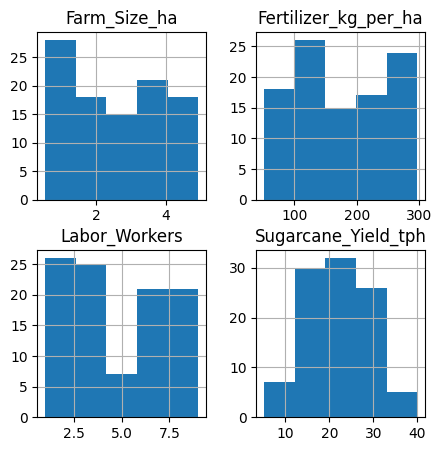

In [9]:
#plot several histograms for the numeric variables.
data.hist(figsize=(5,5),bins=5)
plt.show()

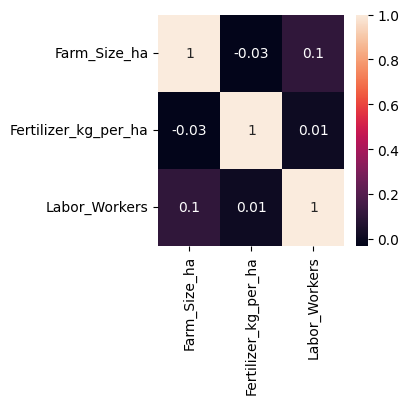

In [6]:
#plotting corellation matrix
corr_matrix=round(data.drop(columns=["Sugarcane_Yield_tph"],axis=1).corr(),2)
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [10]:
#selecting target and features
X=data.drop(columns=["Sugarcane_Yield_tph"],axis=1)
y=data["Sugarcane_Yield_tph"]

In [11]:
X.shape,y.shape

((100, 3), (100,))

In [12]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

                             OLS Regression Results                            
Dep. Variable:     Sugarcane_Yield_tph   R-squared:                       0.689
Model:                             OLS   Adj. R-squared:                  0.676
Method:                  Least Squares   F-statistic:                     56.05
Date:                 Sun, 04 May 2025   Prob (F-statistic):           3.21e-19
Time:                         16:29:49   Log-Likelihood:                -221.92
No. Observations:                   80   AIC:                             451.8
Df Residuals:                       76   BIC:                             461.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

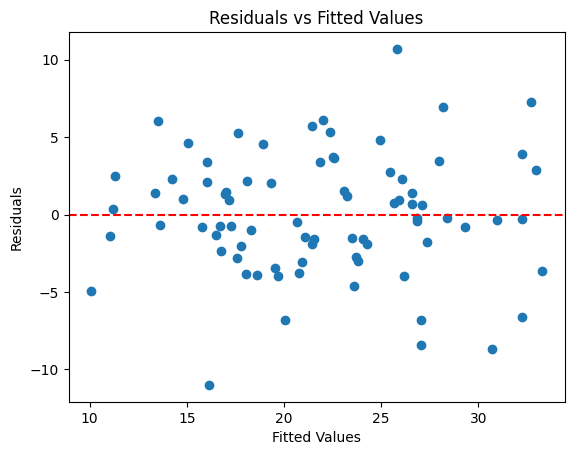

In [13]:
#model fitting using OLs
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

model=sm.OLS(y_train,X_train_sm)
results=model.fit()
print(results.summary())

# Access residuals and fitted values from the 'results' object
residuals = results.resid # Changed from model.resid to results.resid
fitted = results.fittedvalues # Changed from model.fittedvalues to results.fittedvalues


plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [15]:
#model prediction using test data
y_pred=results.predict(X_test_sm)
print(y_pred.head())

83    19.895679
53    24.935197
70    22.446862
45    16.001291
44    14.939935
dtype: float64


83    2.594321
53    2.354803
70   -7.016862
45    4.068709
44    2.300065
dtype: float64


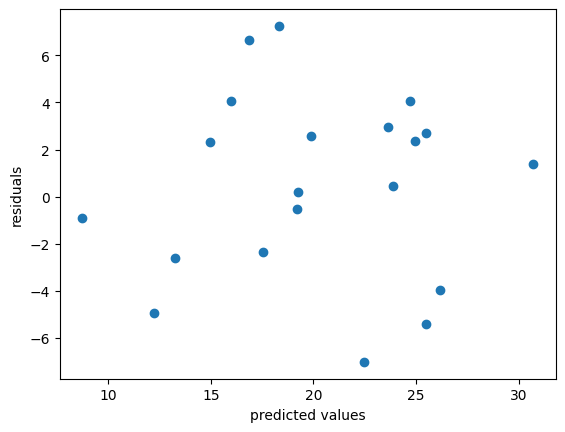

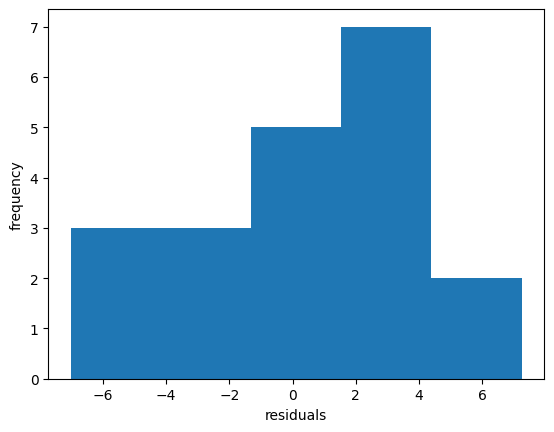

In [17]:
#checking residual for test data
residuals=y_test-y_pred
print(residuals.head())
#plot a scatter plot for the residuals
plt.scatter(y_pred,residuals)
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.show()
#plot a histogram for the residuals
plt.hist(residuals,bins=5)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.show()